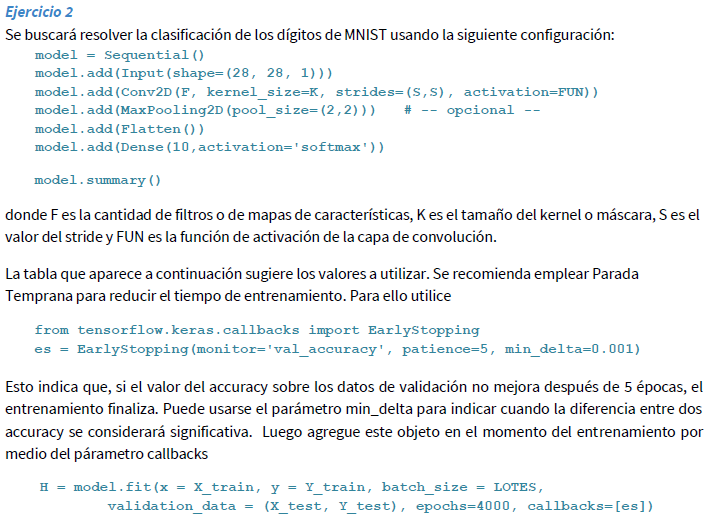

## Preparo dataset

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

# nro. de imagen a visualizar
#plt.imshow(X_train[0, :,:], cmap='gray')

# normalización
X_train = X_train / 255
X_test  = X_test  / 255

## Genero modelo

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential

F = 64
K = (3,3)
S = 1
FUN = 'sigmoid'


model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN)) 
model.add(MaxPooling2D(pool_size=(2,2))) # -- opcional -- 
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │       108,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,810 (425.04 KB)

 Trainable params: 108,810 (425.04 KB)

 Non-trainable params: 0 (0.00 B)

## Entreno modelo

In [29]:
import tensorflow as tf

PACIENCIA = 5
LOTES = 20
EPOCAS = 400

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True, min_delta=0.001)
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES, epochs=EPOCAS, validation_split=0.2, callbacks=[early_stop])

pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

print(f'Se realizaron {len(H.epoch)} épocas.')

Epoch 1/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5864 - loss: 1.3661 - val_accuracy: 0.9111 - val_loss: 0.3346
Epoch 2/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8739 - loss: 0.4560 - val_accuracy: 0.8939 - val_loss: 0.3817
Epoch 3/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9037 - loss: 0.3514 - val_accuracy: 0.9226 - val_loss: 0.2747
Epoch 4/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9333 - loss: 0.2322 - val_accuracy: 0.9315 - val_loss: 0.2455
Epoch 5/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9533 - loss: 0.1578 - val_accuracy: 0.9503 - val_loss: 0.1717
Epoch 6/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.1318 - val_accuracy: 0.9532 - val_loss: 0.1702
Epoch 7/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9702 - loss: 0.1031 - val_accuracy: 0.9597 - val_loss: 0.1405
Epoch 8/400
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9714 - loss: 0

: 

| **Cant. de filtros** | **Tamaño del kernel o filtro** | **Stride** | **Función de activación** | **Max Pooling con filtro de tamaño 2x2 y stride=2** | **Total de parámetros** | **Épocas** | **Accuracy en Train** | **Accuracy en Test** |
|----------------------|--------------------------------|------------|--------------------------|---------------------------------------------------|-------------------------|------------|-----------------------|-----------------------|
| 4                    | 3x3                            | 1          | ReLU                     | Sí                                                 | 6,810                   | 6          | 98.19%                | 97.57%                |
| 16                   | 3x3                            | 1          | ReLU                     | Sí                                                 | 27,210                  | 11         | 98.89%                | 98.09%                |
| 64                   | 3x3                            | 1          | ReLU                     | Sí                                                 | 108,810                 | 8          | 98.84%                | 98.16%                |
| 4                    | 7x7                            | 1          | ReLU                     | Sí                                                 | 5,050                   | 16         | 98.70%                | 98.16%                |
| 16                   | 7x7                            | 1          | ReLU                     | Sí                                                 | 20,170                  | 9          | 98.88%                | 98.50%                |
| 64                   | 7x7                            | 1          | ReLU                     | Sí                                                 | 80,650                  | 10         | 99.46%                | 98.83%                |
| 64                   | 3x3                            | 2          | ReLU                     | No                                                 | 108,810                 | 11         | 99.12%                | 97.91%                |
| 64                   | 3x3                            | 1          | ReLU                     | Sí                                                 | 108,810                 | 11         | 99.25%                | 98.27%                |
| 64                   | 3x3                            | 1          | TanH                     | Sí                                                 | 108,810                 | 7          | 97.78%                | 97.17%                |
| 64                   | 3x3                            | 1          | Sigmoide                 | Sí                                                 | 108,810                 | 16         | 98.47%                | 97.98%                |
